# EECS 545 (WN 2025) Assignment 1: Linear Regression

In this assignment, you will implement a simple linear regression algorithm covered in the Lecture.

In [1]:
from IPython.display import display_html, HTML

display_html(HTML('''
<style type="text/css">
  .instruction { background-color: yellow; font-weight:bold; padding: 3px; }
</style>
'''));

### CHANGELOG

- rev0: Initial release (26. 1. 13. 1PM)
- rev1: Fixed timing error in 2.1(b). Added a tic=time.time() before the SGD run. (26. 1. 19. 3pm)

## Your Information

<span class="instruction">Before starting the assignment, please fill in the following cell.</span>

In [2]:
###################################################################
# Enter your first and last name, e.g. "John Doe"                 #
# for example,                                                    #
# __NAME__ = "Honglak Lee"                                        #
# __UNIQID__ = "honglak"                                          #
###################################################################
__NAME__ = "Huy Le"
__UNIQID__ = "huyle"
###################################################################
#                        END OF YOUR CODE                         #
###################################################################

print(f"Your name and email: {__NAME__} <{__UNIQID__}@umich.edu>")
assert __NAME__ and __UNIQID__

Your name and email: Huy Le <huyle@umich.edu>


## Setup

We will need to have some boilerplate code to set up this notebook. First, run the following cell which loads the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html) IPython magic: this allows us to automatically import and hotload the source files you will be modifying (e.g. `linear_regression.py`) into the notebook for a seamless editing and debugging expreience.

NOTE: It is usually a good practice to implement code ("business logic" or core computation) as a "library", usually implemented with a python module, which can be imported from ipython(jupyter) notebook rather than implementing everything in jupyter notebook cells. This practice would help make your code more testable and well-structured.

In [3]:
%load_ext autoreload
%autoreload 2

More boilerplates follow:

In [4]:
# Import some libraries that are needed in this assignment.
# Note: You should not import or use other packages than numpy and matplotlib that would
# trivialize your work. Actually, you will never need to import them.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# If you run into ImportError (ModuleNotFoundError), uncomment and execute the following line.
# !pip install numpy matplotlib

In [5]:
# This is the python module you are going to implement. See linear_regression.py
import linear_regression

import sys
import datetime

# Dump environment information
print("Current time:", datetime.datetime.now())
print(f"python: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

# Use high-resolution images for inline matplotlib possible whenever possible
%config InlineBackend.figure_format = 'retina'

# Default params for plot
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 20

Current time: 2026-01-28 23:18:04.715348
python: 3.13.5 | packaged by conda-forge | (main, Jun 16 2025, 08:24:05) [Clang 18.1.8 ]
numpy: 2.2.6
matplotlib: 3.10.3


## 2.1. Implementing GD and SGD

### Load the Dataset

Please execute the following cell to load the sample data provided. We also generate the feature vector $\phi(\mathbf{x}^{(i)})$ for each data point $\mathbf x^{(i)}$.

In [6]:
x_train, y_train, x_test, y_test = linear_regression.load_data()
X_train = linear_regression.generate_polynomial_features(x_train, M=2)
X_test = linear_regression.generate_polynomial_features(x_test, M=2)

print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(20, 2)
y_train.shape=(20,)
X_test.shape=(20, 2)
y_test.shape=(20,)


### 2(a)-1: Batch Gradient Descent (GD)

<span class="instruction">Now, implement the iterative batch gradient descent method</span> in the `linear_regression.batch_gradient_descent()` function. The function prototype is given as follows:

In [7]:
linear_regression.batch_gradient_descent?

Signature:
linear_regression.batch_gradient_descent(
    X_train: numpy.ndarray,
    y_train: numpy.ndarray,
    *,
    eta: float = 0.01,
    max_epochs: int = 200,
) -> Tuple[numpy.ndarray, Dict[str, Any]]
Docstring:
Batch gradient descent for linear regression that fits the
feature matrix `X_train` to target `y_train`.

Args:
    X_train: the feature matrix, with shape (N, M).
    y_train: the target label for regression, with shape (N, ).
    eta: Learning rate.
    max_epochs: Maximum iterations (epochs) allowed.
Returns: A tuple (w, info)
    w: The coefficient of linear regression found by GD. Shape (M, ).
    info: A dict that contains additional information. It will include
          'train_objectives' and 'convergence_iter' (see the notebook
          and the implementation below).
File:      ~/Documents/GitHub/EECS545/HW1/linear_regression.py
Type:      function

Note that you are required to implement `linear_regression.compute_objective()` function as well.

In [8]:
linear_regression.compute_objective?

Signature:
linear_regression.compute_objective(
    X: numpy.ndarray,
    y: numpy.ndarray,
    w: numpy.ndarray,
) -> float
Docstring:
The least squares training objective for the linear regression.

Args:
    X: the feature matrix, with shape (N, M).
    y: the target label for regression, with shape (N, ).
    w: the linear regression coefficient, with shape (M, ).
Returns:
    The least square objective term with respect to the coefficient weight w,
    E(\mathbf{w}).
File:      ~/Documents/GitHub/EECS545/HW1/linear_regression.py
Type:      function

Alright, now let's run the GD solver with the provided sample data, fitting the training set. The function should return a 2-tuple `(w, info)`, where:

- `w` : The coefficients generated by the optimization method.
- `info`: The additional informations. In this problem, we will store 'train_objectives' and 'convergence_iter'.

In [9]:
w_gd, _ = linear_regression.batch_gradient_descent(X_train, y_train)
train_objective = linear_regression.compute_objective(X_train, y_train, w=w_gd)

print(f"w = {w_gd}")
print(f"Training objective after convergence = {train_objective}")

assert train_objective <= 4.0, "If you implemented Batch GD correctly, it should be smaller than the given number."

w = [ 1.56534932 -2.04666143]
Training objective after convergence = 2.204963567116256


Let's also measure the test objective (error):

In [10]:
test_objective = linear_regression.compute_objective(X_test, y_test, w=w_gd)

print(f"w = {w_gd}")
print(f"Test objective = {test_objective}")

w = [ 1.56534932 -2.04666143]
Test objective = 2.7016611001685633


### 2.1(a)-2: Stochastic Gradient Descent (SGD)

Next, <span class="instruction">implement the iterative stochastic gradient descent method</span> in the `linear_regression.stochastic_gradient_descent()`, and let's repeat the same process with SGD.

In [11]:
w_sgd, _ = linear_regression.stochastic_gradient_descent(X_train, y_train)
train_objective = linear_regression.compute_objective(X_train, y_train, w=w_sgd)

print(f"w = {w_sgd}")
print(f"Training objective after convergence = {train_objective}")

assert train_objective <= 4.0, "If you implemented Stochastic GD correctly, it should be smaller than the given number."

w = [ 1.61726055 -2.23739054]
Training objective after convergence = 2.1996203434786072


In [12]:
test_objective = linear_regression.compute_objective(X_test, y_test, w=w_sgd)

print(f"w = {w_sgd}")
print(f"Test objective = {test_objective}")

w = [ 1.61726055 -2.23739054]
Test objective = 2.652314594363931


### 2.1(b): Drawing Learning Curves for GD and SGD

Now, we will compare two optimizations in terms of the number of epochs required to converge, the time spent for the computation.
 
In this problem, we will use the additional information and statistics stored in `info`
from `batch_gradient_descent` and `stochastic_gradient_descent`. Note that the use of `info` dictionary is a very common practice in ML implementations (e.g. [torch.grad](https://pytorch.org/functorch/stable/generated/functorch.grad.html?highlight=has_aux), [jax.grad](https://jax.readthedocs.io/en/latest/_autosummary/jax.grad.html?highlight=has_aux)). 

Please execute the following cell, and report the plot with the time spent for each method in your **writeup**.

GD version took 0.00 seconds
GD Test objective = 2.7017
SGD version took 0.02 seconds
SGD Test objective = 2.6796


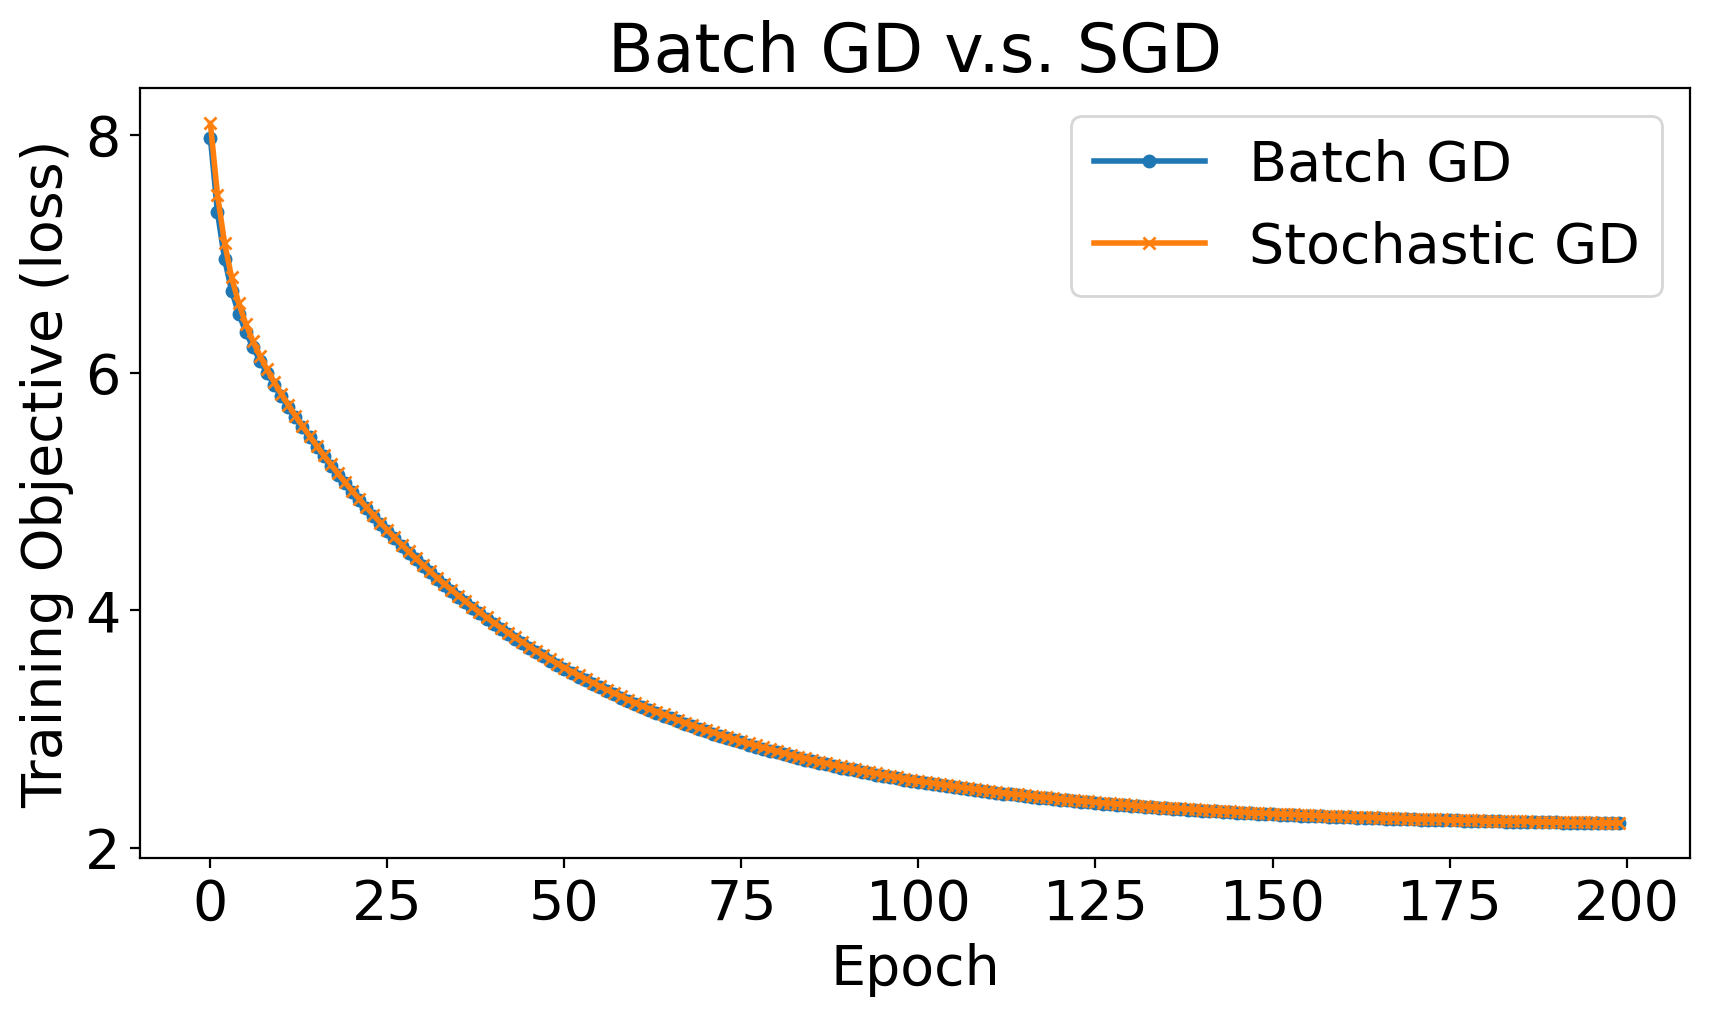

In [13]:
import time

eta = 0.01

tic = time.time()
w_gd, info_gd = linear_regression.batch_gradient_descent(X_train, y_train, eta=eta)
toc = time.time()
gd_time = toc - tic
print(f'GD version took {gd_time:.2f} seconds')

gd_test = linear_regression.compute_objective(X_test, y_test, w=w_gd)
print(f"GD Test objective = {gd_test:.4f}")

tic = time.time()
w_sgd, info_sgd = linear_regression.stochastic_gradient_descent(X_train, y_train, eta=eta)
toc = time.time()
sgd_time = toc - tic
print(f'SGD version took {sgd_time:.2f} seconds')

sgd_test = linear_regression.compute_objective(X_test, y_test, w=w_sgd)
print(f"SGD Test objective = {sgd_test:.4f}")

fig, ax = plt.subplots()
ax.plot(info_gd["train_objectives"], linewidth=2.0, marker='o', markersize=4, label='Batch GD')
ax.plot(info_sgd["train_objectives"], linewidth=2.0, marker='x', markersize=4, label='Stochastic GD')

# NOTE: It is always a good practice to include label and title for matplotlib plots.
ax.set_title("Batch GD v.s. SGD")
ax.set_ylabel("Training Objective (loss)")
ax.set_xlabel("Epoch")
ax.legend()
plt.show()

## 2.2: Overfitting Study

### 2.2(a): Implementing the closed form solution

Next, you will investigate the problem of overfitting. Recall the figure from the Lecture 2~3, which explores over-fitting as a function of the degree of the polynomial $M-1$.

As instructed in the problem set, we will use the closed form solution of linear regression instead of iterative optimizations.
<span class="instruction">Implement the function `linear_regression.closed_form()`, which gives the optimal solution of the linear regression</span> that minimizes the following loss function:

$$
E(\mathbf w) = \frac{1}{2} \sum_{i=1}^N \left( \sum_{j=0}^{M-1} w_j \phi_j(x^{(i)}) - y^{(i)} \right)^2 = \frac{1}{2} \sum_{i=1}^N ({\mathbf w}^\top \phi(x^{(i)}) - y^{(i)})^2
$$

In [14]:
linear_regression.closed_form?

Signature:
linear_regression.closed_form(
    X_train: numpy.ndarray,
    y_train: numpy.ndarray,
    *,
    reg: float = 0.0,
) -> numpy.ndarray
Docstring:
Return the closed form solution of linear regression.

Arguments:
    X_train: The X feature matrix, shape (N, M).
    y_train: The y vector, shape (N).
    reg: The regularization coefficient lambda.

Returns:
    The (optimal) coefficient w for the linear regression problem found,
    a numpy array of shape (M, ).
File:      ~/Documents/GitHub/EECS545/HW1/linear_regression.py
Type:      function

### 2.2(b): Plot generation

To find the parameters, use the closed form solution of linear regression (assuming all the condition is met) that minimize the error for a $M-1$-degree polynomial (for $M = 1, \ldots, 10$) for the training data `x_train` (q2xTrain.npy) and `y_train` (q2yTrain.npy). For the test curve, use the data in `x_test` (q2xTest.npy) and `y_test` (q2yTest.npy)

Note: For different values of $M$, we assume the feature vector is
$$
    \phi(x^{(i)}) = \big[ 1, x^{(i)}, (x^{(i)})^2, \cdots, (x^{(i)})^{M-1} \big]
$$
for each $x^{(i)}$.

For example, we can get the coefficient $\mathbf{w}$ of `closed_form` for M=10 as

In [15]:
X_train = linear_regression.generate_polynomial_features(x_train, M=10)
w_closed = linear_regression.closed_form(X_train, y_train)
print(f"w_closed = {w_closed}")

w_closed = [-1.28448426e+01  5.52667591e+02 -7.92237704e+03  5.69004748e+04
 -2.32271278e+05  5.72617068e+05 -8.68948267e+05  7.93763243e+05
 -4.00214307e+05  8.55405044e+04]


Now, we want to plot the chart as instructed in the problemset: plot $E_\text{RMS}$ (y-axis) over $M=1,2,\cdots,9,10$ (x-axis).
<span class="instruction">Complete the function `linear_regression.compute_rms_for_m()`, which computes the train and the test RMS error of the closed_form function, for given M and lambda.</span>

In [16]:
linear_regression.compute_rms_for_m?

Signature:
linear_regression.compute_rms_for_m(
    x_train,
    y_train,
    x_test,
    y_test,
    degree: int,
    reg: float = 0.0,
) -> Tuple[float, float]
Docstring:
Compute the RMS error for linear regression. Specifically, it uses closed_form to get the optimal coefficients 'w_m'.

Args:
    x_train: A numpy array with shape (N_train, ).
    y_train: the target label for regression, with shape (N_train, ).
    x_test: A numpy array with shape (N_test, ).
    y_test: the target label for regression, with shape (N_test, ).
    degree: the degree of the polynomial.
    reg: The regularization coefficient lambda.
Returns: A tuple (train_rms_error, test_rms_error)
    train_rms_error: train set RMS error for the coefficient w_m obtained from closed_form
    test_rms_error: test set RMS error for the coefficient w_m obtained from closed_form
File:      ~/Documents/GitHub/EECS545/HW1/linear_regression.py
Type:      function

Once you implemented correctly, you should be able to see a plot similar to the one in the problemset. Please attach your plot to your **writeup** and answer the question.

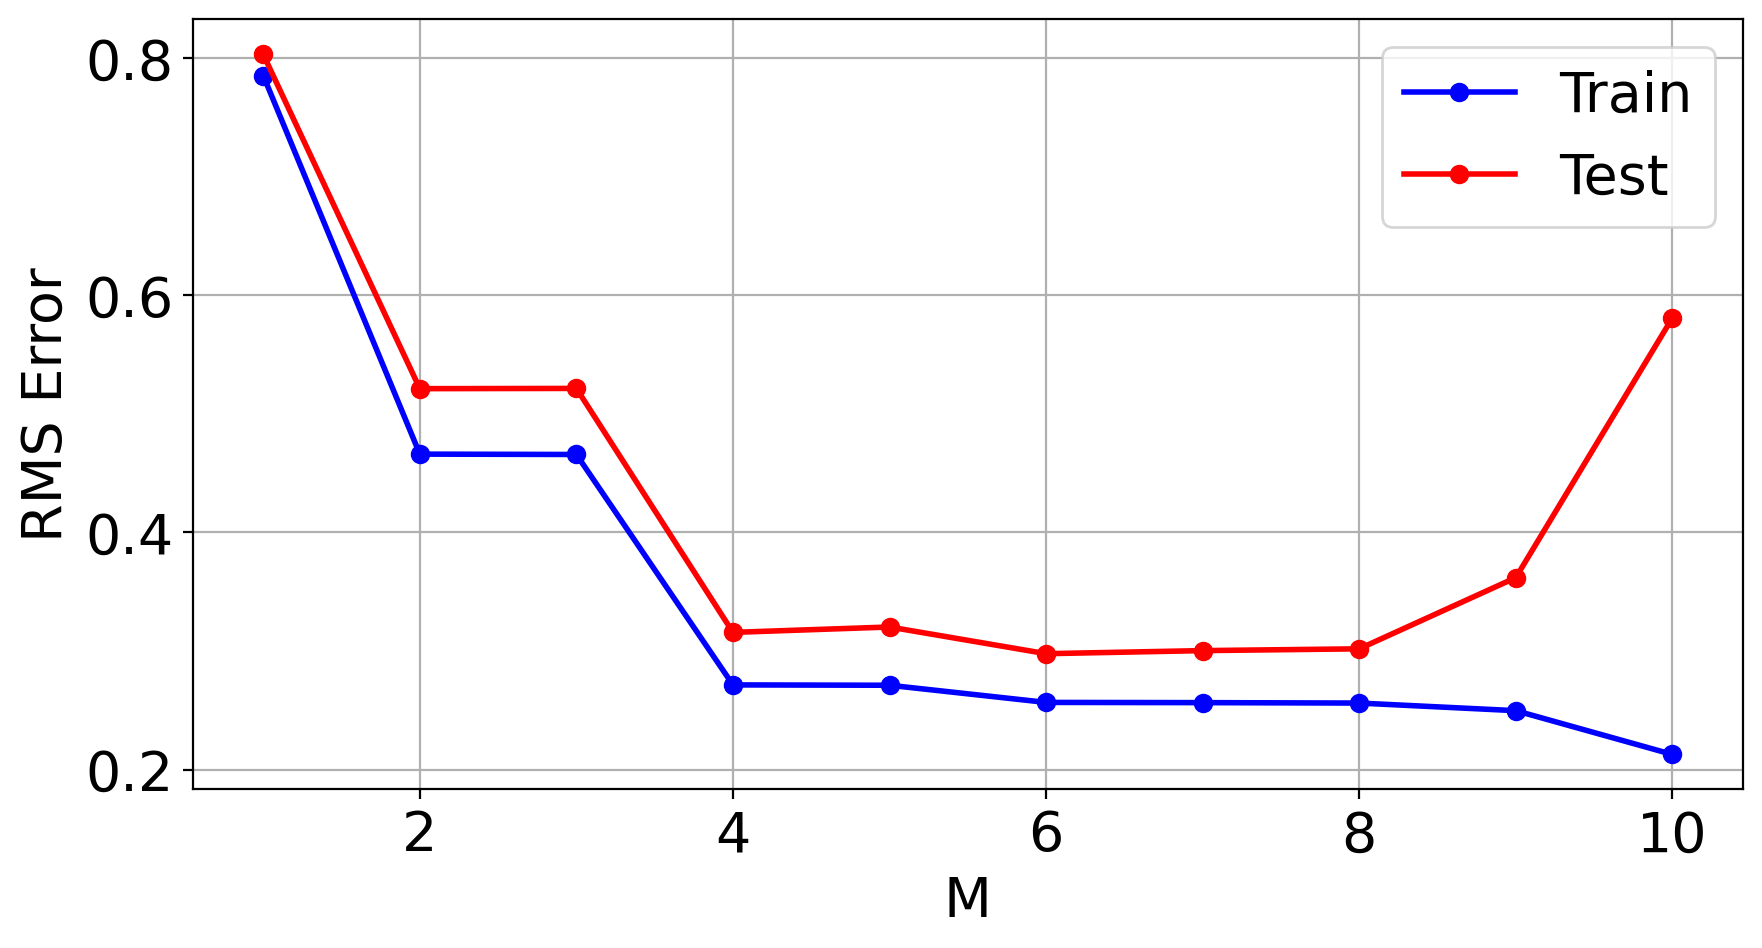

In [17]:
fig, ax = plt.subplots()

M = 10
train_rms_errors = []
test_rms_errors = []
for M_candidate in range(1, M+1): #therefore the degrees are 1 to 10
    degree = M_candidate - 1
    train_rms_error, test_rms_error = linear_regression.compute_rms_for_m(
                                      x_train, y_train, x_test, y_test, degree)
    
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

ax.plot(np.arange(1, M + 1), train_rms_errors,
        label='Train', color='b', marker='o', linewidth=2.0)
ax.plot(np.arange(1, M + 1), test_rms_errors,
        label='Test', color='r', marker='o', linewidth=2.0)

ax.grid()
ax.legend()
ax.set(xlabel="M", ylabel="RMS Error")

plt.show()

## 2.3. Regularization


In this section, we will find the coefficients that minimize the error for a $M=10$ , i.e. degree 9 polynimal given the regularization coefficient $\lambda$, over $\lambda \in \{0, 10^{-8}, 10^{-7}, 10^{-6}, \cdots, 10^{-1}, 10^{0} (=1) \}$.

### 2.3(a). Regularization (ridge regression)

<span class="instruction">Modify the implementation of `linear_regression.closed_form(...)` so that it takes the regularization coefficient $\lambda$ into consideration.</span> The regularized object function is:
$$
\frac{1}{2} \sum_{i=1}^N (\mathbf w^\top \phi(\mathbf x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2}\| \mathbf w \|_2^2
$$


In [18]:
X_train = linear_regression.generate_polynomial_features(x_train, M=10)
X_test = linear_regression.generate_polynomial_features(x_test, M=10)
w_closed_1 = linear_regression.closed_form(X_train, y_train, reg=1.0)
print(f"w_closed (lambda = 1) = {w_closed_1}")

w_closed_10 = linear_regression.closed_form(X_train, y_train, reg=10.0)
print(f"w_closed (lambda = 10) = {w_closed_10}")

assert np.any(w_closed_1 != w_closed_10), "It should have different number once your function properly handle the lambda value."

w_closed (lambda = 1) = [ 1.09391122 -0.5562542  -0.64508948 -0.44632318 -0.23832084 -0.07497711
  0.04238758  0.12305092  0.17653349  0.21044824]
w_closed (lambda = 10) = [ 0.44859242 -0.05856978 -0.12295032 -0.11143244 -0.08784082 -0.06596552
 -0.04837131 -0.03486872 -0.02469375 -0.01708544]


### 2.3(b): Generate Plot

<span class="instruction">Draw a plot of the **RMS** error over different values of $\log_{10} \lambda$ (x-axis).</span>
Be sure to plot the original (un-regularized) $E_\text{RMS}$ when plotting, and also include legend. Use this result and plot to write your answer in the writeup. Which $\lambda$ gives you the best performance?

<>:18: SyntaxWarning: invalid escape sequence '\i'
<>:29: SyntaxWarning: invalid escape sequence '\i'
<>:18: SyntaxWarning: invalid escape sequence '\i'
<>:29: SyntaxWarning: invalid escape sequence '\i'
/var/folders/26/s5l3n3t15wg9rjh2bhcv9syw0000gn/T/ipykernel_1661/3828519613.py:18: SyntaxWarning: invalid escape sequence '\i'
  log_lambda_labels = ["$-\infty$", *log_lambdas[1:]]
/var/folders/26/s5l3n3t15wg9rjh2bhcv9syw0000gn/T/ipykernel_1661/3828519613.py:29: SyntaxWarning: invalid escape sequence '\i'
  log_lambda_labels = ["$-\infty$", *log_lambdas[1:]]


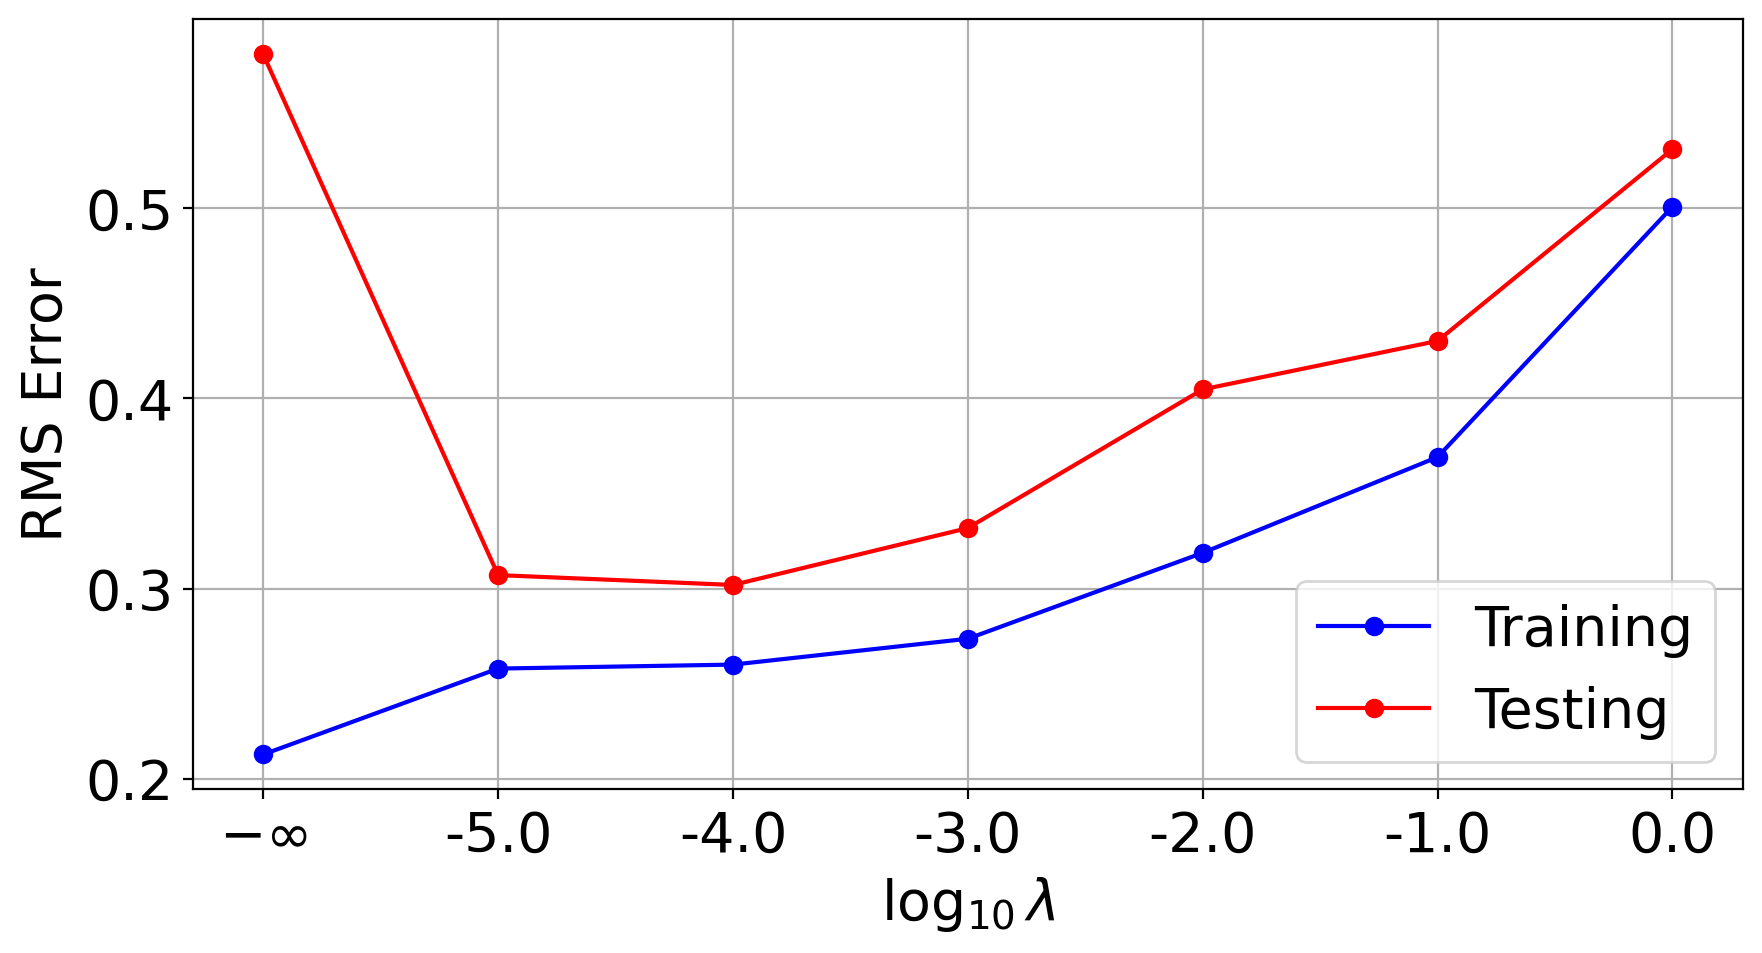

In [19]:
fig, ax = plt.subplots()

degree = 9
lambdas = np.array([0] + [pow(10, x) for x in [-5, -4, -3, -2, -1, 0]])

train_rms_error_lambda = []
test_rms_error_lambda = []
for reg in lambdas:
    train_rms_error, test_rms_error = linear_regression.compute_rms_for_m(
                                      x_train, y_train, x_test, y_test, degree, reg)
    train_rms_error_lambda.append(train_rms_error)
    test_rms_error_lambda.append(test_rms_error)

assert train_rms_error_lambda[-1] != train_rms_error_lambda[-2], "It should have different number if your compute_rms_for_m function properly handle the lambda value."
assert test_rms_error_lambda[-1] != test_rms_error_lambda[-2], "It should have different number if your compute_rms_for_m function properly handle the lambda value."

log_lambdas = np.log10(lambdas + np.array([1e-6, *np.zeros(6)]))
log_lambda_labels = ["$-\infty$", *log_lambdas[1:]]

ax.plot(log_lambdas, train_rms_error_lambda, c='blue', marker='o', label='Training')
ax.plot(log_lambdas, test_rms_error_lambda, c='red', marker='o', label='Testing')
ax.legend(loc='best')


ax.grid()
ax.set(xlabel=r"$\log_{10} \lambda$", ylabel="RMS Error")

log_lambdas = np.log10(lambdas + np.array([1e-6, *np.zeros(6)]))
log_lambda_labels = ["$-\infty$", *log_lambdas[1:]]
ax.set_xticks(log_lambdas, labels=log_lambda_labels)

plt.show()

## 3. Locally-weighted Linear Regression

In the below cells, you will implement locally-weighted linear regression discussed in Q3(d).

### 3.(d).i <span class="instruction"> Implement the following function:</span>

In [20]:
linear_regression.closed_form_locally_weighted?

Signature:
linear_regression.closed_form_locally_weighted(
    X_train: numpy.ndarray,
    y_train: numpy.ndarray,
    r_train: numpy.ndarray,
) -> numpy.ndarray
Docstring:
Return the closed form solution of locally weighted linear regression.

Arguments:
    X_train: The X feature matrix, shape (N, M).
    y_train: The y vector, shape (N, ).
    r_train: The local weights for data point. Shape (N, ).

Returns:
    The (optimal) coefficient for the locally weighted linear regression
    problem found. A numpy array of shape (M, ).
File:      ~/Documents/GitHub/EECS545/HW1/linear_regression.py
Type:      function

### 3.(d).ii Generate Plot
You can test and draw the requested plot as follows. In order to get the correct plot, you are required to implement `compute_y_space` function first.

In [21]:
linear_regression.compute_y_space?

Signature:
linear_regression.compute_y_space(
    X_train: numpy.ndarray,
    x_train: numpy.ndarray,
    y_train: numpy.ndarray,
    x_space: numpy.ndarray,
    tau: float,
) -> numpy.ndarray
Docstring:
Return the y value for each matched x for plotting graph.
You are first required to compute the local coefficients w from closed_form_locally_weighted function.
Then, you will compute the matched y_space from the local w value.
Arguments:
    X_train: The X feature matrix, shape (N, M).
    x_train: The x datapoint vector, shape (N, ).
    y_train: The y vector, shape (N, ).
    x_space: x point we would like to print out, shape (K, ).
    tau: bandwidth parameter. Please see the equation in the problemset.
Returns:
    locally weighted linear regression y_space values of shape (K, ). Each item in this list are matched with x_space of the same index position.
File:      ~/Documents/GitHub/EECS545/HW1/linear_regression.py
Type:      function

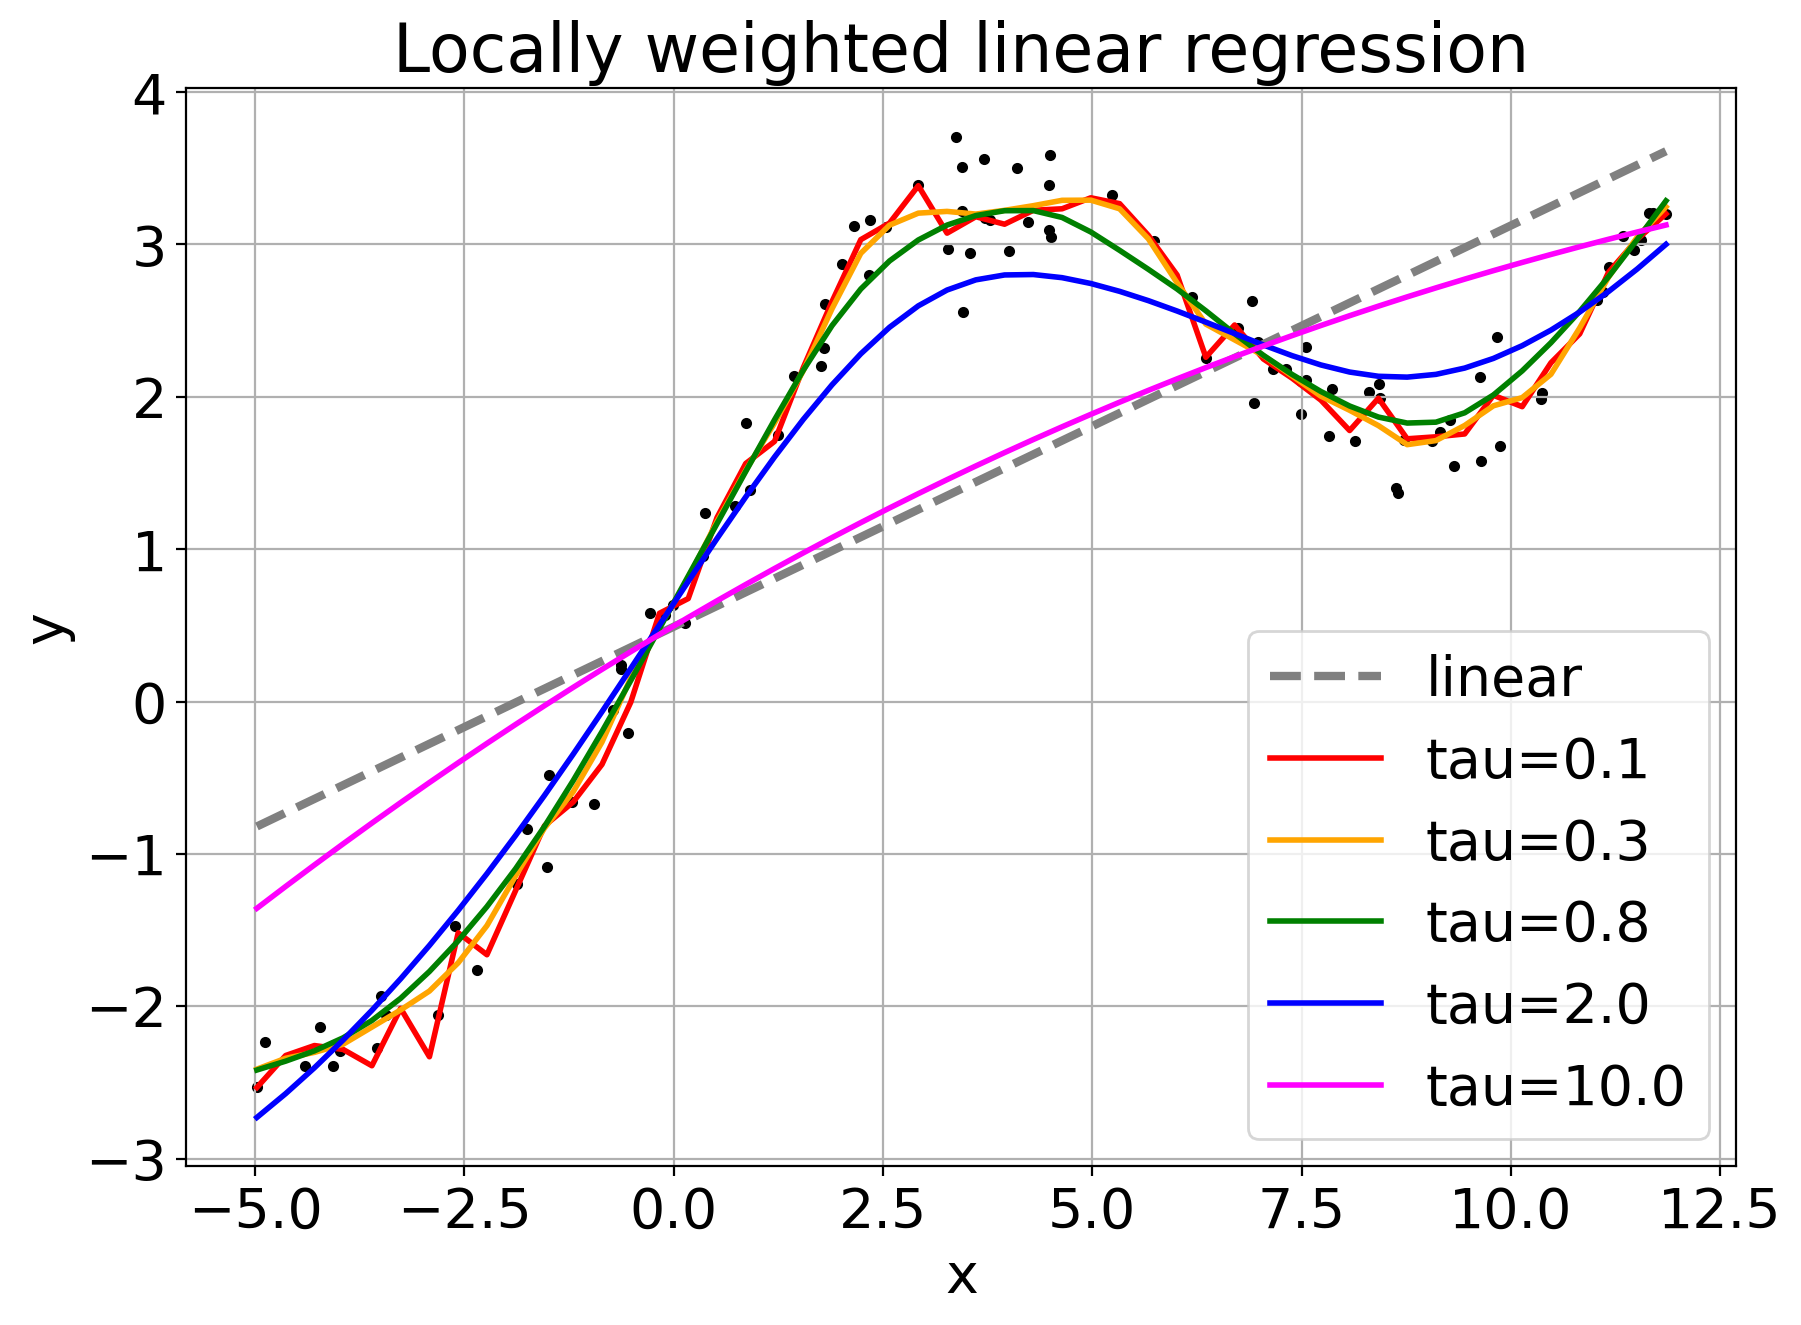

In [22]:
x_train = np.load('data/q3x.npy')
y_train = np.load('data/q3y.npy')
X_train = linear_regression.generate_polynomial_features(x_train, M=2)

K = 50
# Scatter plot of data
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title("Locally weighted linear regression")
ax.set(xlabel='x', ylabel='y')
ax.scatter(x_train, y_train, marker='.', c='black')

#
# The ordinary linear regression
#
w_linear = linear_regression.closed_form(X_train, y_train)

x_space = np.linspace(x_train.min(), x_train.max(), num=K)
ax.plot(x_space,
        x_space * w_linear[1] + w_linear[0],
        c='gray', linestyle='--', label='linear', linewidth=3)

#
# Locally-weighted linear regression
#
taus = [0.1, 0.3, 0.8, 2.0, 10.0]
colors = ['red', 'orange', 'green', 'blue', 'magenta']

for color, tau in zip(colors, taus):
    y_space = linear_regression.compute_y_space(X_train, x_train, y_train, x_space, tau)
    ax.plot(x_space, y_space,
            c=color, label=f'tau={tau}', linewidth=2)

ax.legend()
ax.grid()
plt.show()